In [12]:
import csv

key_ds1 = ['time','T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T','T_gasIn.inlet.m_flow','T_waterIn.inlet.m_flow']
key_ds2 = ['time_t','RecupHP_out_T', 'Turbine_in_T','HotOil_Evap_in_T', 'HotOil_Evap_out_T', 'RecupHP_out_P', 'Turbine_in_P','Cycle_Mdot','HotOil_Mdot']
key_mock_input = ['time_mock', 'HotOil_Evap_in_T', 'HotOil_Mdot']

# ds = {k:[] for k in key_ds1}
ds = {**{k:[] for k in key_ds1}, **{k:[] for k in key_ds2}}
ds_mock = {** {k:[] for k in key_mock_input}}

with open('TestDyn_PCHE_PHE_data.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds1:
            v = float(row[k])
            if k in {'T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T'}:
                v = v - 273.15
            ds[k].append(v)
                
            
with open('PHE_data.csv', newline='') as data_file:
    reader = csv.DictReader(data_file)
    
    for row in reader:
        for k in key_ds2:
            ds[k].append(float(row[k]))                
            
# with open('PHE_input.csv', newline='') as data_file:
#     reader = csv.DictReader(data_file)
    
#     for row in reader:
#         for k in key_mock_input:
#             v = float(row[k])
#             ds_mock[k].append(v)
            


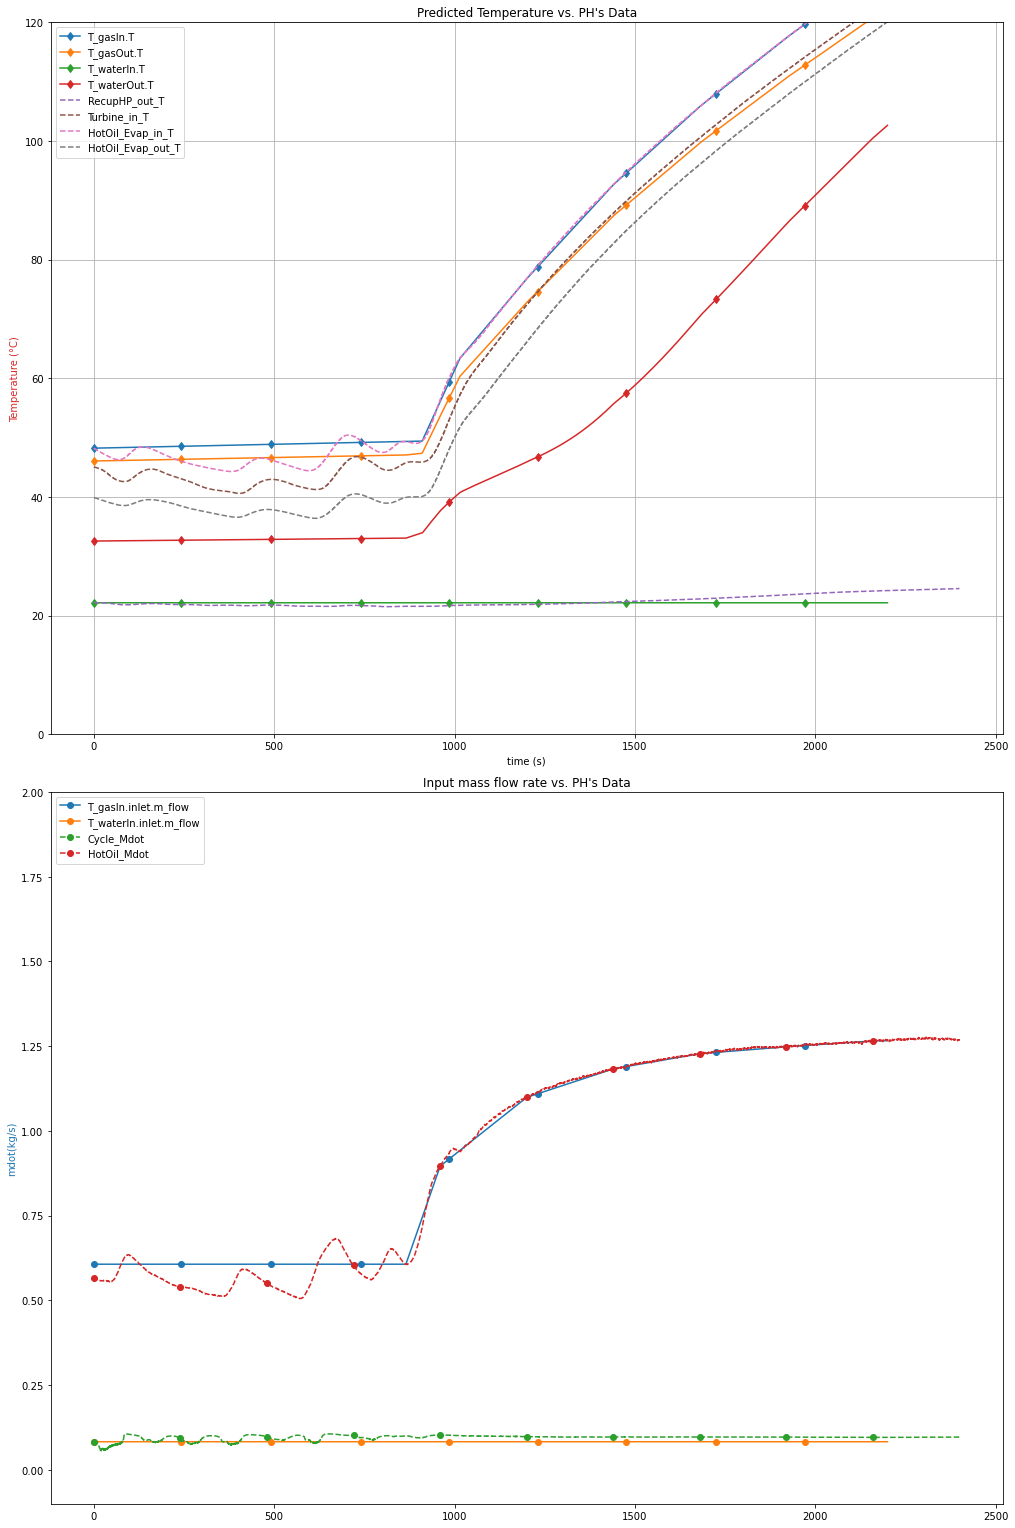

In [24]:
import matplotlib # kernel for proper conda env required. 
import matplotlib.pyplot as plt
import numpy as np

px = 1 / plt.rcParams['figure.dpi'] # pixel in inches
fig, axs = plt.subplots(2, 1, figsize=(1024*px, 768*2*px))
dict_line = {}

for k in ['T_gasIn.T', 'T_gasOut.T', 'T_waterIn.T', 'T_waterOut.T']:
    l, = axs[0].plot(ds['time'], ds[k],'-d',markevery=200, label=k)
    dict_line[k]  = l

for k in ['RecupHP_out_T', 'Turbine_in_T','HotOil_Evap_in_T', 'HotOil_Evap_out_T']:       
    l, = axs[0].plot(ds['time_t'], ds[k], '--', label=k)
    dict_line[k] = l
    
# plot the mock input
# l, = ax.plot(ds_mock['time_mock'], ds_mock['HotOil_Evap_in_T'], '-*',markevery=1200)
   
    
color = 'tab:red'    
axs[0].set_xlabel('time (s)')
axs[0].set_ylabel('Temperature (°C)', color=color)
axs[0].set_ylim([0,120])
axs[0].set_title("Predicted Temperature vs. PH's Data")
axs[0].grid()
axs[0].legend(loc='upper left')

# ax2 = ax.twinx()
color = 'tab:blue'
    
for k in ['T_gasIn.inlet.m_flow','T_waterIn.inlet.m_flow']:
    l, = axs[1].plot(ds['time'], ds[k], '-o',markevery=200, label=k)
    dict_line[k] = l

for k in ['Cycle_Mdot','HotOil_Mdot']:
    l, = axs[1].plot(ds['time_t'], ds[k], '--o',markevery=1200, label=k)
    dict_line[k] = l   
    
# plot the mock mdot
# l, = ax2.plot(ds_mock['time_mock'], ds_mock['HotOil_Mdot'], '-*',markevery=1200)

axs[1].set_ylabel('mdot(kg/s)',color=color)
axs[1].set_ylim([-0.1,2])
axs[1].set_title("Input mass flow rate vs. PH's Data")
axs[1].legend(loc='upper left')

# fig.legend(dict_line.values() ,dict_line.keys(), 'upper right')
fig.tight_layout()

fig.savefig("test.png")
plt.show()

this is a Markdown cell
# and this is a title

* can you explain it to me?

``` bash
this a bash code block in a markdown file
conda activate steps 
```

$$
    E = M \cdot C^2
$$